In [1]:
from glob import glob
import numpy as np
import xarray as xr
from xorca.lib import load_xorca_dataset
from cmocean import cm
from matplotlib import pyplot as plt
import xgcm
from dask.distributed import Client, LocalCluster

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

In [2]:
#cluster = LocalCluster(n_workers=4, threads_per_worker=2, memory_limit=64e9,
#                       silence_logs=50)
#client = Client(address=cluster)

In [3]:
#client

In [2]:
work_dir = '/scratch/usr/shkifmjr/'
loc_dir = '/scratch/usr/shklvn09/'
config = 'ORION10.L46.LIM2vp.CFCSF6.MOPS.JRA.XIOS2.5'
conf_short = 'ORION'
xres = '10'
run = 'EXP02'
res_5d = '5d'
res_1m = '1m'
time_range = '1977'

savepath = loc_dir + 'SDIR/' + config + '-' + run + '/figures/'

In [3]:
output_base_5d = sorted(glob(work_dir + config + '-' + run + '/OUT/'
                          + config + '-' + run + '_' + res_5d + '_' + time_range + '*.nc'))
output_nest_5d = sorted(glob(work_dir + config + '-' + run + '/OUT/'
                          + '1_' + config + '-' + run + '_' + res_5d + '_' + time_range + '*.nc'))
output_base_1m = sorted(glob(work_dir + config + '-' + run + '/OUT/'
                          + config + '-' + run + '_' + res_1m + '_' + time_range + '*.nc'))
output_nest_1m = sorted(glob(work_dir + config + '-' + run + '/OUT/'
                          + '1_' + config + '-' + run + '_' + res_1m + '_' + time_range + '*.nc'))

In [4]:
output_base_5d

['/scratch/usr/shkifmjr/ORION10.L46.LIM2vp.CFCSF6.MOPS.JRA.XIOS2.5-EXP02/OUT/ORION10.L46.LIM2vp.CFCSF6.MOPS.JRA.XIOS2.5-EXP02_5d_19770101_19771231_grid_T.nc',
 '/scratch/usr/shkifmjr/ORION10.L46.LIM2vp.CFCSF6.MOPS.JRA.XIOS2.5-EXP02/OUT/ORION10.L46.LIM2vp.CFCSF6.MOPS.JRA.XIOS2.5-EXP02_5d_19770101_19771231_grid_U.nc',
 '/scratch/usr/shkifmjr/ORION10.L46.LIM2vp.CFCSF6.MOPS.JRA.XIOS2.5-EXP02/OUT/ORION10.L46.LIM2vp.CFCSF6.MOPS.JRA.XIOS2.5-EXP02_5d_19770101_19771231_grid_V.nc',
 '/scratch/usr/shkifmjr/ORION10.L46.LIM2vp.CFCSF6.MOPS.JRA.XIOS2.5-EXP02/OUT/ORION10.L46.LIM2vp.CFCSF6.MOPS.JRA.XIOS2.5-EXP02_5d_19770101_19771231_mops.nc']

In [5]:
meshmask_base = glob(loc_dir + 'NUDATA/' + conf_short + '/' + xres + '-data/meshmask/mesh_mask.nc')
meshmask_nest = glob(loc_dir + 'NUDATA/' + conf_short + '/' + xres + '-data/meshmask/1_mesh_mask.nc')

In [7]:
meshmask_nest

['/scratch/usr/shklvn09/NUDATA/ORION/10-data/meshmask/1_mesh_mask.nc']

In [6]:
mops_vars = {'O2': {'dims': ['t', 'z_c', 'y_c', 'x_c']},
             'PO4': {'dims': ['t', 'z_c', 'y_c', 'x_c']},
             'NO3': {'dims': ['t', 'z_c', 'y_c', 'x_c']},
             'DIC': {'dims': ['t', 'z_c', 'y_c', 'x_c']},
             'DICP': {'dims': ['t', 'z_c', 'y_c', 'x_c']},
             'ALK': {'dims': ['t', 'z_c', 'y_c', 'x_c']},
             'idealpo4': {'dims': ['t', 'z_c', 'y_c', 'x_c']},
             'CFC12': {'dims': ['t', 'z_c', 'y_c', 'x_c']},
             'SF6': {'dims': ['t', 'z_c', 'y_c', 'x_c']},
             'co2flux': {'dims': ['t', 'y_c', 'x_c']},
             'co2flux_pre': {'dims': ['t', 'y_c', 'x_c']},
             'ph': {'dims': ['t', 'y_c', 'x_c']},
             'ph_pre': {'dims': ['t', 'y_c', 'x_c']},
             'fco2': {'dims': ['t', 'y_c', 'x_c']},
             'fco2_pre': {'dims': ['t', 'y_c', 'x_c']}}

In [9]:
data_base_5d = load_xorca_dataset(data_files=output_base_5d, aux_files=meshmask_base, model_config='GLOBAL',
                               update_orca_variables = mops_vars,
                               input_ds_chunks = {"time_counter": 73, "t": 73,
                                                  "z": 2, "deptht": 2, "depthu": 2, 
                                                  "depthv": 73, "depthw": 73},
                               target_ds_chunks = {"t": 73, "z_c": 2, "z_l": 2}, decode_cf=True)

In [10]:
data_nest_5d = load_xorca_dataset(data_files=output_nest_5d, aux_files=meshmask_nest, model_config='NEST',
                               update_orca_variables = mops_vars,
                               input_ds_chunks = {"time_counter": 73, "t": 73,
                                                  "z": 2, "deptht": 2, "depthu": 2, 
                                                  "depthv": 73, "depthw": 73},
                               target_ds_chunks = {"t": 73, "z_c": 2, "z_l": 2}, decode_cf=True)

In [7]:
data_base_1m = load_xorca_dataset(data_files=output_base_1m, aux_files=meshmask_base, model_config='GLOBAL',
                               update_orca_variables = mops_vars,
                               input_ds_chunks = {"time_counter": 12, "t": 12,
                                                  "z": 2, "deptht": 2, "depthu": 2, 
                                                  "depthv": 12, "depthw": 12},
                               target_ds_chunks = {"t": 12, "z_c": 2, "z_l": 2}, decode_cf=True)

In [12]:
data_nest_1m = load_xorca_dataset(data_files=output_nest_1m, aux_files=meshmask_nest, model_config='NEST',
                               update_orca_variables = mops_vars,
                               input_ds_chunks = {"time_counter": 12, "t": 12,
                                                  "z": 2, "deptht": 2, "depthu": 2, 
                                                  "depthv": 12, "depthw": 12},
                               target_ds_chunks = {"t": 12, "z_c": 2, "z_l": 2}, decode_cf=True)

In [9]:
base_at = data_base_1m['e1t'] * data_base_1m['e2t']
base_au = data_base_1m['e1u'] * data_base_1m['e2u']
base_av = data_base_1m['e1v'] * data_base_1m['e2v']
base_af = data_base_1m['e1f'] * data_base_1m['e2f']
base_vt = data_base_1m['e3t'] * base_at 
base_vu = data_base_1m['e3u'] * base_au 
base_vv = data_base_1m['e3v'] * base_av 
base_vw = data_base_1m['e3w'] * base_at

data_base_1m = data_base_1m.update({'at': base_at, 'au': base_au, 'av': base_av, 'af': base_af,
                                    'vt': base_vt, 'vu': base_vu, 'vv': base_vv, 'vw': base_vw})

data_base_1m = data_base_1m.set_coords(['at', 'au', 'av', 'af', 'vt', 'vu', 'vv', 'vw'])

#data_base_5d = data_base_5d.update({'at': base_at, 'au': base_au, 'av': base_av, 'af': base_af,
 #                                   'vt': base_vt, 'vu': base_vu, 'vv': base_vv, 'vw': base_vw})

#data_base_5d = data_base_5d.set_coords(['at', 'au', 'av', 'af', 'vt', 'vu', 'vv', 'vw'])

In [14]:
nest_at = data_nest_1m['e1t'] * data_nest_1m['e2t']
nest_au = data_nest_1m['e1u'] * data_nest_1m['e2u']
nest_av = data_nest_1m['e1v'] * data_nest_1m['e2v']
nest_af = data_nest_1m['e1f'] * data_nest_1m['e2f']
nest_vt = data_nest_1m['e3t'] * nest_at 
nest_vu = data_nest_1m['e3u'] * nest_au 
nest_vv = data_nest_1m['e3v'] * nest_av 
nest_vw = data_nest_1m['e3w'] * nest_at

data_nest_1m = data_nest_1m.update({'at': nest_at, 'au': nest_au, 'av': nest_av, 'af': nest_af,
                                    'vt': nest_vt, 'vu': nest_vu, 'vv': nest_vv, 'vw': nest_vw})

data_nest_1m = data_nest_1m.set_coords(['at', 'au', 'av', 'af', 'vt', 'vu', 'vv', 'vw'])

data_nest_5d = data_nest_5d.update({'at': nest_at, 'au': nest_au, 'av': nest_av, 'af': nest_af,
                                    'vt': nest_vt, 'vu': nest_vu, 'vv': nest_vv, 'vw': nest_vw})

data_nest_5d = data_nest_5d.set_coords(['at', 'au', 'av', 'af', 'vt', 'vu', 'vv', 'vw'])

In [10]:
base_metrics = {
    ('X',): ['e1t', 'e1u', 'e1v', 'e1f'], # X distances
    ('Y',): ['e2t', 'e2u', 'e2v', 'e2f'], # Y distances
    ('Z',): ['e3t', 'e3u', 'e3v', 'e3w'], # Z distances
    ('X', 'Y'): ['at', 'au', 'av', 'af'], # Areas
    ('X', 'Y', 'Z'): ['vt', 'vu', 'vv', 'vw'] # Volumes
}

In [17]:
nest_metrics = {
    ('X',): ['e1t', 'e1u', 'e1v', 'e1f'], # X distances
    ('Y',): ['e2t', 'e2u', 'e2v', 'e2f'], # Y distances
    ('Z',): ['e3t', 'e3u', 'e3v', 'e3w'], # Z distances
    ('X', 'Y'): ['at', 'au', 'av', 'af'], # Areas
    ('X', 'Y', 'Z'): ['vt', 'vu', 'vv', 'vw'] # Volumes
}

In [18]:
nest_metrics_noZ = {
    ('X',): ['e1t', 'e1u', 'e1v', 'e1f'], # X distances
    ('Y',): ['e2t', 'e2u', 'e2v', 'e2f'], # Y distances
    ('X', 'Y'): ['at', 'au', 'av', 'af'], # Areas
    }

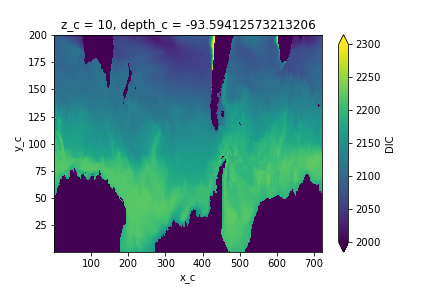

In [11]:
data_base_1m['DIC'].isel(z_c=9, y_c=slice(0,200)).mean('t').plot(vmin=2000, vmax=2300)

In [25]:
#temp = data_nest_5d['votemper'].isel(t=73,z_c=9,x_c=slice(2200,3500),y_c=slice(150,550))
#sal = data_nest_5d['vosaline'].isel(t=73,z_c=9,x_c=slice(2200,3500),y_c=slice(150,550))
dic = data_nest_5d['DIC'].isel(t=72,z_c=9,x_c=slice(2200,3500),y_c=slice(150,550))
#oxy = data_nest_5d['O2'].isel(t=73,z_c=9,x_c=slice(2200,3500),y_c=slice(150,550))
#cfc = data_nest_5d['CFC12'].isel(t=73,z_c=9,x_c=slice(2200,3500),y_c=slice(150,550))
lon = data_nest_5d['llon_cc'].isel(x_c=slice(2200,3500),y_c=slice(150,550))
lat = data_nest_5d['llat_cc'].isel(x_c=slice(2200,3500),y_c=slice(150,550))
printdate = str(data_nest_5d['t'].isel(t=72).values)[0:10]

In [23]:
plt.figure(figsize=(20,6))
plt.pcolormesh(lon, lat, temp, cmap=cm.thermal, vmin=-1, vmax=20)
plt.tight_layout()
plt.colorbar()

NameError: name 'temp' is not defined

<Figure size 1440x432 with 0 Axes>

In [ ]:
region = data_nest_1m.isel(t=slice(12,72)).squeeze().mean('t')
grid = xgcm.Grid(region, metrics=nest_metrics)

In [ ]:
temp_grad = grid.diff(region['votemper'].isel(z_c=0), "Y")

In [ ]:
temp_grad.plot(robust=True)

In [ ]:
region2 = data_nest_5d.isel(z_c=9, z_l=9, t=300)
grid2 = xgcm.Grid(region2, metrics=nest_metrics_noZ)

In [ ]:
vort = grid2.diff(region2['vomecrty'], "X") - grid2.diff(region2['vozocrtx'], "Y")

In [ ]:
plt.figure(figsize=(20,6))
plt.pcolormesh(vort, cmap=cm.curl, vmin=-0.1, vmax=0.1)
plt.tight_layout()

In [ ]:
plt.figure(figsize=(20,6))
plt.pcolormesh(lon, lat, temp_grad, cmap=cm.balance, vmin=-1, vmax=1)
plt.tight_layout()
plt.colorbar()

In [ ]:
plt.figure(figsize=(20,6))
plt.pcolormesh(lon, lat, sal, cmap=cm.haline, vmin=33.8, vmax=35.7)
plt.tight_layout()
plt.colorbar()

In [ ]:
plt.figure(figsize=(20,6))
plt.pcolormesh(lon, lat, oxy, cmap=cm.ice, vmin=210, vmax=380)
plt.tight_layout()
plt.colorbar()

In [ ]:
plt.figure(figsize=(20,6));
for tt in np.arange(0, 10):# len(data_nest['t'])):
    dic = data_nest['DIC'].isel(t=tt,z_c=16,x_c=slice(2200,3500),y_c=slice(150,550))
    printdate = str(data_nest['t'].isel(t=tt).values)[0:10]
    plt.clf();
    plt.pcolormesh(lon, lat, dic, cmap=cm.tempo_r, vmin=2100, vmax=2250);
    plt.xlabel('longitude');
    plt.ylabel('latitude');
    plt.title('DIC at 271m, t=' + printdate)
    plt.colorbar();
    plt.tight_layout()
    plt.savefig(savepath + 'ani/DIC_SOATL_z16_t00' + str(tt) + '.png', format='PNG', dpi=100);

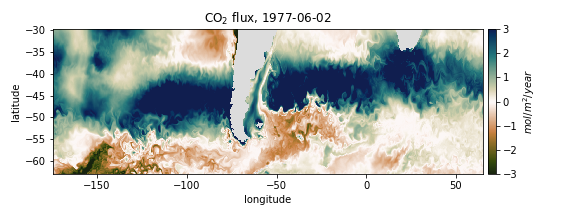

In [40]:
plt.figure(figsize=(8,3));
for tt in np.arange(30, 31):#len(data_nest['t'])):
    co2flux = (data_nest_5d['co2flux'].isel(t=tt,x_c=slice(1100,3500), y_c=slice(120,710)))
    printdate = str(data_nest_5d['t'].isel(t=tt).values)[0:10]
    plt.clf();
    plt.pcolormesh(data_nest_5d['llon_cc'].isel(x_c=slice(1100,3500),y_c=slice(120,710)),
                   data_nest_5d['llat_cc'].isel(x_c=slice(1100,3500),y_c=slice(120,710)), 
                   co2flux, cmap=cm.tarn, vmin=-3, vmax=3);
    plt.xlabel('longitude');
    plt.ylabel('latitude');
    plt.title('CO$_2$ flux, ' + printdate)
    c = plt.colorbar(pad=0.01);
    c.ax.set_ylabel('$mol/m^2/year$')
    plt.contourf(data_nest_5d['llon_cc'].isel(x_c=slice(1100,3500),y_c=slice(120,710)),
                 data_nest_5d['llat_cc'].isel(x_c=slice(1100,3500),y_c=slice(120,710)),
                 data_nest_5d['tmask'].isel(z_c=0, x_c=slice(1100,3500),
                 y_c=slice(120,710)).where(data_nest_5d['tmask'].isel(z_c=0, x_c=slice(1100,3500),
                 y_c=slice(120,710)) == 0.), vmin=0.5, vmax=1.5, colors='gainsboro')
    plt.tight_layout()
    plt.savefig(savepath + 'CO2flux_SOATL_z0_t' + str(tt) + '.png', format='PNG', dpi=600);

In [33]:
data_nest_5d

<xarray.Dataset>
Dimensions:      (t: 73, x_c: 3564, x_r: 3564, y_c: 629, y_r: 629, z_c: 46, z_l: 46)
Coordinates:
  * z_c          (z_c) int64 1 2 3 4 5 6 7 8 9 10 ... 38 39 40 41 42 43 44 45 46
  * z_l          (z_l) float64 0.5 1.5 2.5 3.5 4.5 ... 41.5 42.5 43.5 44.5 45.5
  * y_c          (y_c) int64 1 2 3 4 5 6 7 8 ... 622 623 624 625 626 627 628 629
  * y_r          (y_r) float64 1.5 2.5 3.5 4.5 5.5 ... 626.5 627.5 628.5 629.5
  * x_c          (x_c) int64 1 2 3 4 5 6 7 ... 3559 3560 3561 3562 3563 3564
  * x_r          (x_r) float64 1.5 2.5 3.5 4.5 ... 3.562e+03 3.564e+03 3.564e+03
    depth_c      (z_c) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    depth_l      (z_l) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    llat_cc      (y_c, x_c) float32 dask.array<chunksize=(629, 3564), meta=np.ndarray>
    llat_cr      (y_c, x_r) float32 dask.array<chunksize=(629, 3564), meta=np.ndarray>
    llat_rc      (y_r, x_c) float32 dask.array<chunksize=(629, 3564), meta=np.ndar

In [ ]:
xmin = 2000
xmax = 3500
ymin = 50
ymax = 550

lon = data_nest_5d['llon_cc'].isel(x_c=slice(xmin,xmax),y_c=slice(ymin,ymax))
lat = data_nest_5d['llat_cc'].isel(x_c=slice(xmin,xmax),y_c=slice(ymin,ymax))

plt.figure(figsize=(20,6));
for tt in np.arange(100, len(data_nest_5d['t'])):
    fco2 = data_nest_5d['fco2'].isel(t=tt,x_c=slice(xmin,xmax),y_c=slice(ymin,ymax))
    printdate = str(data_nest_5d['t'].isel(t=tt).values)[0:10]
    plt.clf();
    plt.pcolormesh(lon, lat, fco2, cmap=cm.rain_r, vmin=260, vmax=340);
    plt.xlabel('longitude');
    plt.ylabel('latitude');
    plt.title('fCO2, t=' + printdate)
    plt.colorbar();
    plt.contourf(lon, lat, data_nest_5d['tmask'].isel(z_c=0, x_c=slice(xmin,xmax),
                 y_c=slice(ymin,ymax)).where(data_nest_5d['tmask'].isel(z_c=0, x_c=slice(xmin,xmax), 
                 y_c=slice(ymin,ymax)) == 0.), vmin=0.5, vmax=1.5, colors='gainsboro')
    plt.tight_layout()
    plt.savefig(savepath + 'ani/fCO2_SOATL_z0_t' + str(tt) + '.png', format='PNG', dpi=100);

In [ ]:
plt.figure(figsize=(20,6))
plt.pcolormesh(lon, lat, cfc, cmap=cm.amp_r, vmin=0.2e-11, vmax=1.2e-11)
plt.tight_layout()
plt.colorbar()

Nest boundaries in base indeces: 5 717 61 186

In [18]:
reg_base = xr.decode_cf(data_base_5d.isel(z_c=9, z_l=9, y_c=slice(0,222), y_r=slice(0,222)).roll(x_r=-214, x_c=-214))
grid_base = xgcm.Grid(reg_base, metrics=nest_metrics_noZ)

reg_nest1 = xr.decode_cf(data_nest_5d.isel(z_c=9, z_l=9, x_r=slice(2, 1047), x_c=slice(2, 1047)))
grid_nest1 = xgcm.Grid(reg_nest1, metrics=nest_metrics_noZ)
reg_nest2 = xr.decode_cf(data_nest_5d.isel(z_c=9, z_l=9, x_r=slice(1047, 3564), x_c=slice(1047, 3564)))
grid_nest2 = xgcm.Grid(reg_nest2, metrics=nest_metrics_noZ)

In [19]:
base_u = grid_base.interp(reg_base['vozocrtx'], "X", to="center")
base_v = grid_base.interp(reg_base['vomecrty'], "Y", to="center")
base_speed = ((base_u**2 + base_v**2)**0.5).isel(t=1360).compute()

nest_u_1 = grid_nest1.interp(reg_nest1["vozocrtx"], "X", to="center")
nest_v_1 = grid_nest1.interp(reg_nest1["vomecrty"], "Y", to="center")
nest_speed_1 = ((nest_u_1**2 + nest_v_1**2)**0.5).isel(t=1360).compute()

nest_u_2 = grid_nest2.interp(reg_nest2["vozocrtx"], "X", to="center")
nest_v_2 = grid_nest2.interp(reg_nest2["vomecrty"], "Y", to="center")
nest_speed_2 = ((nest_u_2**2 + nest_v_2**2)**0.5).isel(t=1360).compute()

In [20]:
base_lon = reg_base['llon_cc'].compute()
base_lat = reg_base['llat_cc'].compute()
nest_lon_1 = reg_nest1['llon_cc'].compute()
nest_lat_1 = reg_nest1['llat_cc'].compute()
nest_lon_2 = reg_nest2['llon_cc'].compute()
nest_lat_2 = reg_nest2['llat_cc'].compute()
nest_lat_min = nest_lat_1.min().compute()
nest_lat_max = nest_lat_1.max().compute()
nest_lon_min = nest_lon_1.min().compute()
nest_lon_max = nest_lon_2.max().compute()

In [21]:
from netCDF4 import num2date

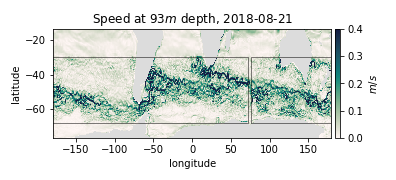

In [24]:
plt.figure(figsize=(5.5, 2.5))
tt = 1360

#for tt in np.arange(1360, 1361):#len(data_nest_5d['t'])):
plt.clf()
printdate = str(data_nest_5d['t'].isel(t=tt).values)[0:10]
plt.pcolormesh(base_lon, base_lat, base_speed, vmin=0., vmax=0.5, cmap=cm.tempo)
plt.pcolormesh(nest_lon_1, nest_lat_1, nest_speed_1, vmin=0., vmax=0.4, cmap=cm.tempo)
plt.pcolormesh(nest_lon_2, nest_lat_2, nest_speed_2, vmin=0., vmax=0.4, cmap=cm.tempo)
c = plt.colorbar(pad=0.01);
c.ax.set_ylabel('$m/s$')
plt.contourf(base_lon, base_lat, reg_base['tmask'].where(reg_base['tmask'] == 0.), vmin=0.5, vmax=1.5, colors='gainsboro')
plt.plot([180, nest_lon_min, nest_lon_min, 180],
         [nest_lat_max, nest_lat_max, nest_lat_min, nest_lat_min], color='k', linewidth=0.5)
plt.plot([-180, nest_lon_max, nest_lon_max, -180],
         [nest_lat_max, nest_lat_max, nest_lat_min, nest_lat_min], color='k', linewidth=0.5)
plt.xlim(-180, 180)
plt.xlabel('longitude');
plt.ylabel('latitude');
plt.title('Speed at 93$m$ depth, ' + printdate)
plt.tight_layout()
plt.savefig(savepath + 'VOSPEED_SO_z0_t' + str(tt) + '.png', format='PNG', dpi=600)